In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
##H2O Gas
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826       #kJ/mol
deltaS_298=188.835         #J/mol


dT=0.1
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [53]:
##H2O Gas
A=-203.6060
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830      #kJ/mol
deltaS_298=69.95         #J/mol


dT=0.1
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

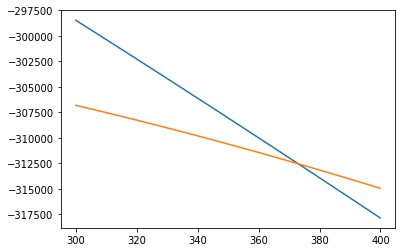

In [54]:
plt.plot(T,deltaG_gas)
plt.plot(T,deltaG_liq)
plt.show()

In [55]:
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp)
np.where(dp==minimo)

(array([730]),)

In [58]:
T[730]

373.0000000000166

In [59]:
import requests 

In [79]:
url="https://janaf.nist.gov/tables/N-007.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]
for X in datos:
    s=X.split("\t")
    mat.append([float(a) for a in s])
mat=np.array(mat)
mat
    

array([[ 1.00000e+02,  3.32760e+01,  2.02563e+02,  2.71168e+02,
        -6.86100e+00,  3.48980e+01,  3.99630e+01, -2.08740e+01],
       [ 2.00000e+02,  3.43850e+01,  2.25852e+02,  2.43325e+02,
        -3.49500e+00,  3.38970e+01,  4.54220e+01, -1.18630e+01],
       [ 2.50000e+02,  3.55930e+01,  2.33649e+02,  2.40634e+02,
        -1.74600e+00,  3.34600e+01,  4.83550e+01, -1.01030e+01],
       [ 2.98150e+02,  3.69740e+01,  2.40034e+02,  2.40034e+02,
         0.00000e+00,  3.30950e+01,  5.12580e+01, -8.98000e+00],
       [ 3.00000e+02,  3.70290e+01,  2.40262e+02,  2.40034e+02,
         6.80000e-02,  3.30830e+01,  5.13710e+01, -8.94400e+00],
       [ 3.50000e+02,  3.85830e+01,  2.46086e+02,  2.40491e+02,
         1.95800e+00,  3.27680e+01,  5.44450e+01, -8.12500e+00],
       [ 4.00000e+02,  4.01710e+01,  2.51342e+02,  2.41524e+02,
         3.92700e+00,  3.25120e+01,  5.75600e+01, -7.51700e+00],
       [ 4.50000e+02,  4.17280e+01,  2.56164e+02,  2.42886e+02,
         5.97500e+00,  3.23100e+0

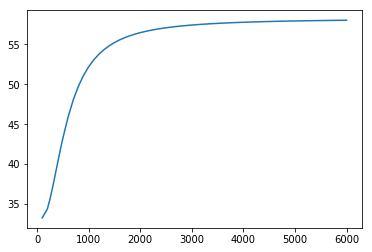

In [80]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [ ]:
T=T[3:16]
Y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

In [ ]:
Cp_calc=beta.dot(X.T)

In [ ]:

plt.plot(T,Cp_calc,color="red")
plt.scatter(T,y)
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()